# 2. Statistical Learning - Applied

### Q8

In [27]:
import pandas as pd
import seaborn as sns
# 8(c) read data
path = 'Data\college.csv'
college = pd.read_csv('data/College.csv')

# 8(b) label rows by college
df_college = college.set_index(['Unnamed: 0'], append=True, verify_integrity=True)
df_college.rename_axis([None, 'College'], inplace=True)
df_college.head()

,,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
,College,,,,,,,,,,,,,,,,,,
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [28]:
# 8(c)i get statistical summary
df_college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


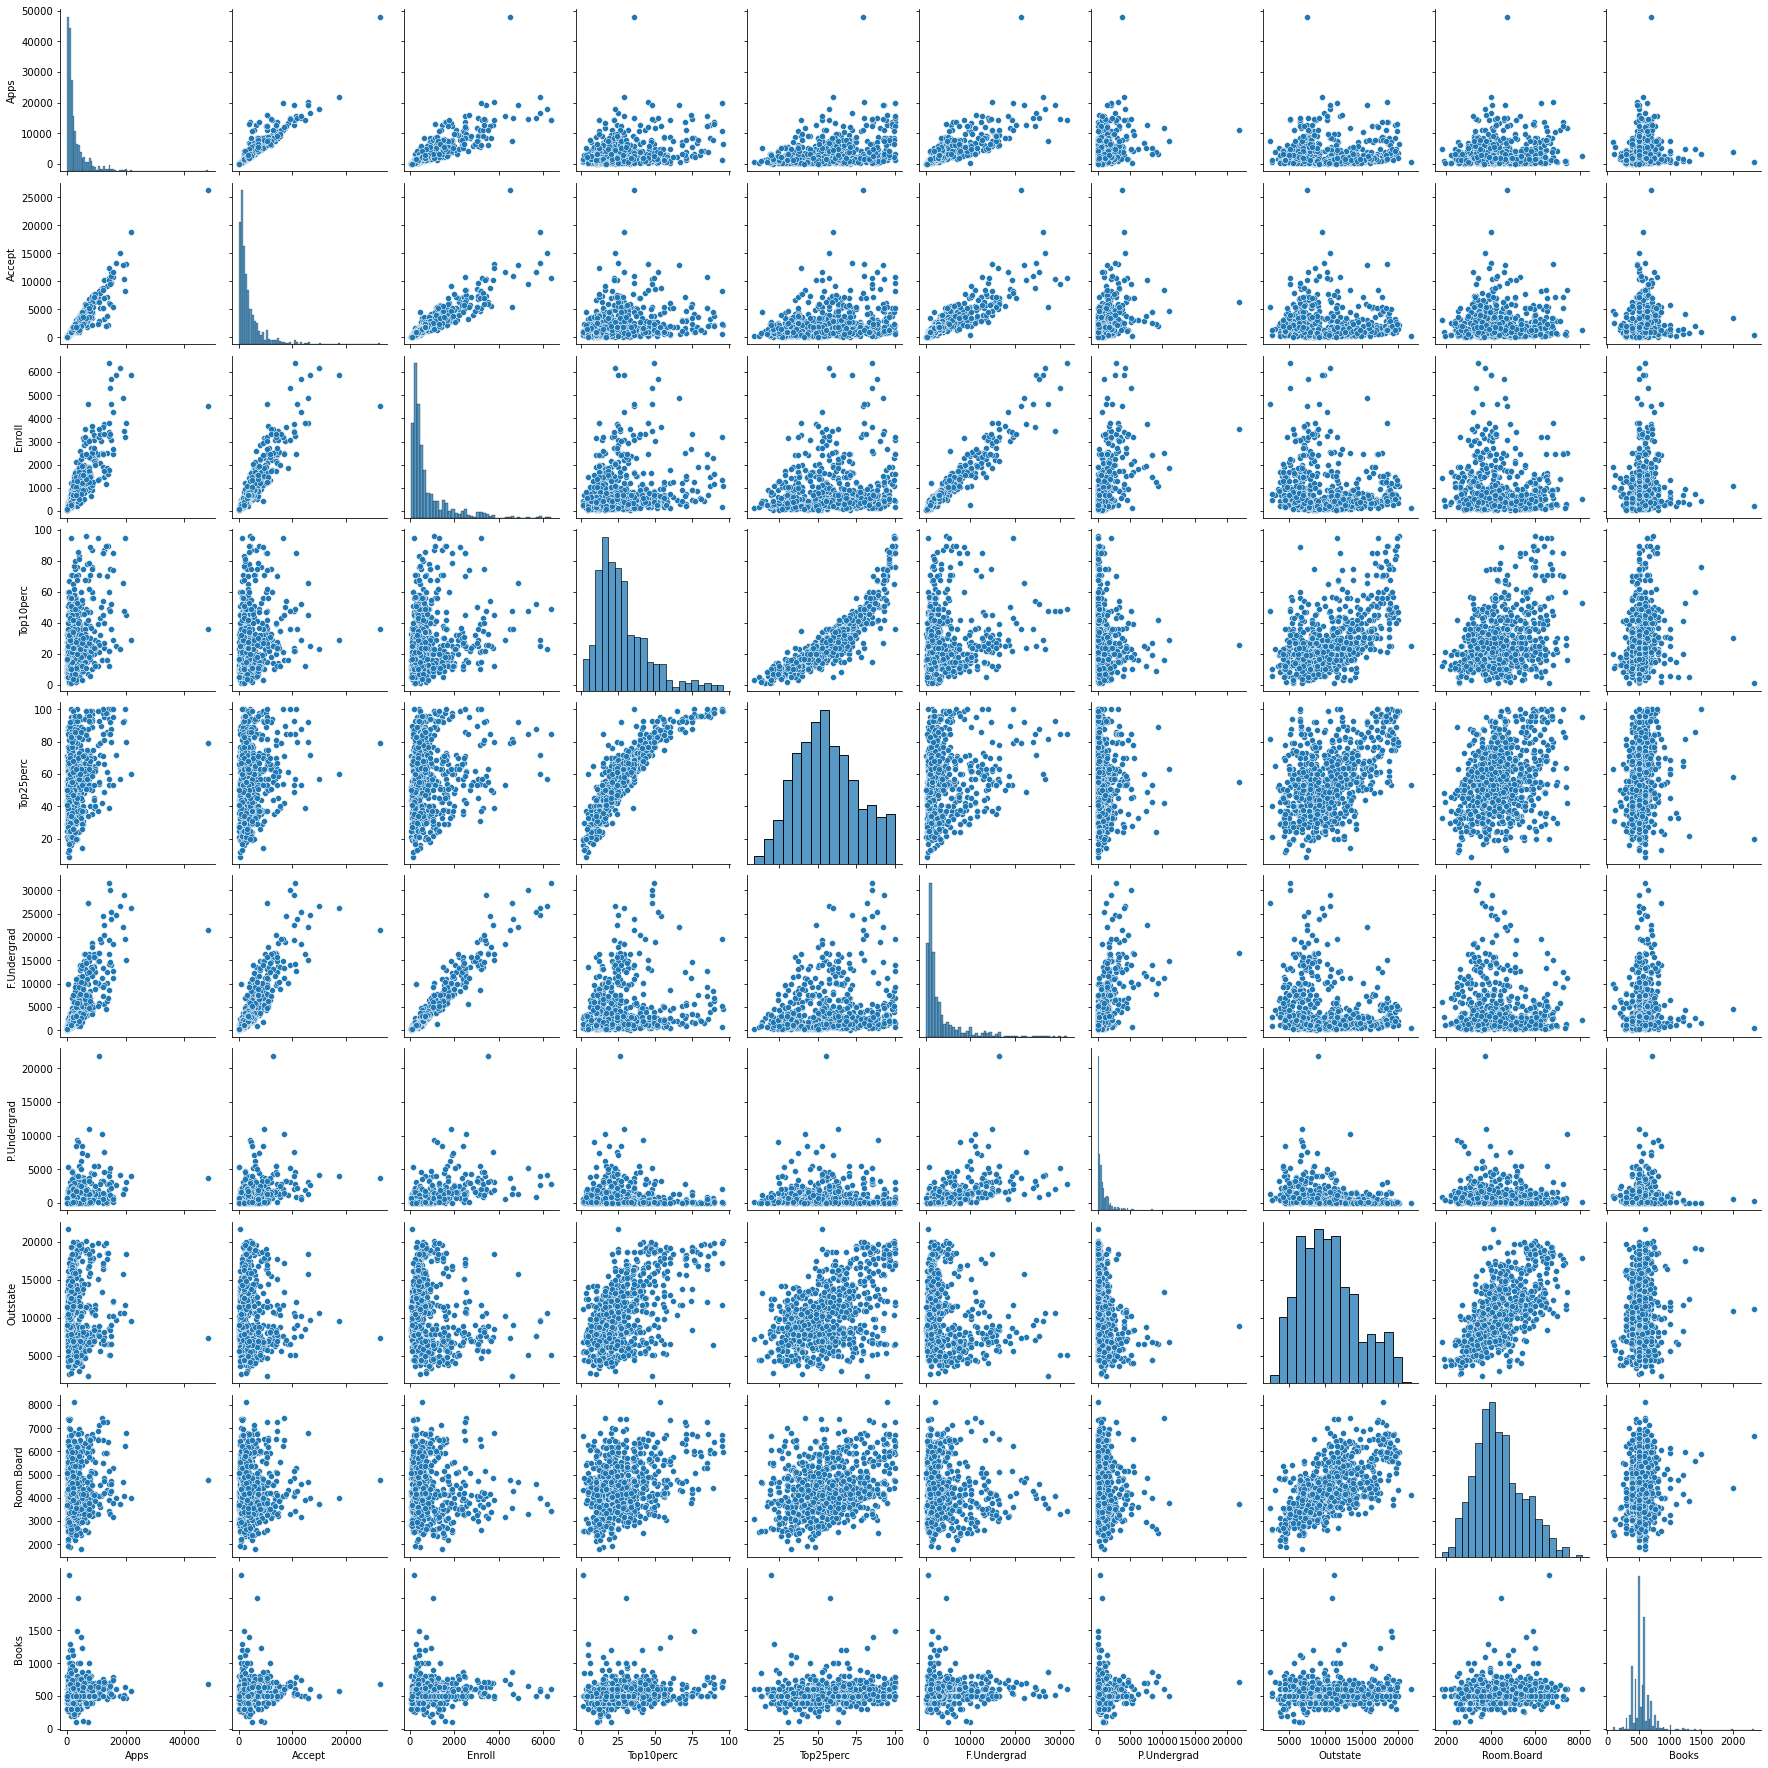

In [29]:
# 8(c)ii produce a scatterplot matrix of the first ten columns or variables of the data
sns.pairplot(df_college.iloc[:, 1:11]);

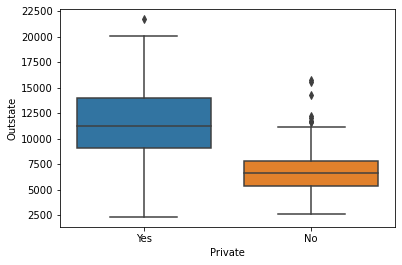

In [31]:
# 8c iii. produce side-by-side boxplots of Outstate versus Private.
sns.boxplot(x=df_college['Private'], y=df_college['Outstate']);

In [37]:
# 8c iv. Create a new qualitative variable, called Elite, by binning the Top10perc variable. 
# We are going to divide universities into two groups based on whether or not the proportion 
# of students coming from the top 10% of their high school classes exceeds 50 %.

df_college['Elite'] = df_college['Top10perc'] > 50

In [39]:
#  8c iv. see how many elite universities there are.
df_college['Elite'].sum()

78

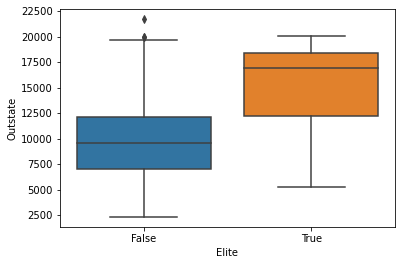

In [40]:
# Now use the plot() function to produce side-by-side boxplots of Outstate versus Elite.
sns.boxplot(x=df_college['Elite'], y=df_college['Outstate']);

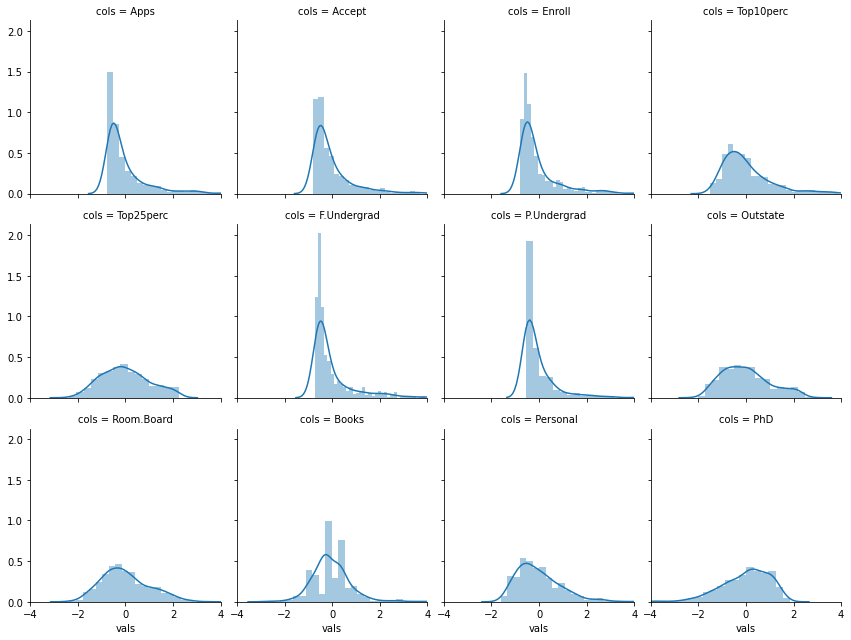

In [52]:
# 8c v. Use the hist() function to produce some histograms with differing numbers of bins 
# for a few of the quantitative variables.
import warnings
warnings.filterwarnings('ignore')
def scale(df):
    """Xi = Xi - mu(Xi) / s(Xi)
    mu -> mean
    s -> standard deviation"""
    return (df-df.mean())/(df.std())


feature_count = 12

# Remove units
df_norm = scale(df_college.iloc[:, 1:feature_count+1])
# Recast data into long format using melt
df_meltd = df_norm.melt(var_name='cols', value_name='vals')


# Plot grid of plots
g = sns.FacetGrid(df_meltd, col='cols', col_wrap=4)
g.map(sns.distplot, 'vals')
g.set(xlim=(-4, 4));